In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Recursos de NLTK
# nltk.download('punkt')
# nltk.download('stopwords')

# nltk.download('wordnet')  # necesario para WordNetLemmatizer


In [6]:
path_file_codebook = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Codebook - Feminism and Anti-feminism.xlsx"

df_codebook = pd.read_excel(path_file_codebook)

df_codebook.head()

,ID,Code,Definition,Survey question / comments,Category,Sub-category,Feminism Stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues


In [7]:
df_codebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          48 non-null     int64 
 1   Code                        48 non-null     object
 2   Definition                  29 non-null     object
 3   Survey question / comments  21 non-null     object
 4   Category                    48 non-null     object
 5   Sub-category                28 non-null     object
 6   Feminism Stance             48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [8]:
df_codebook.shape

(48, 7)

In [9]:
# Convert column names to lowercase and replace characters

df_codebook.columns = df_codebook.columns.str.lower()
df_codebook.columns = df_codebook.columns.str.replace(' / ', '_').str.replace(' ', '_').str.replace('-', '_')
df_codebook = df_codebook.rename(columns={'survey_question_comments': 'comments'})


df_codebook.head(2)

,id,code,definition,comments,category,sub_category,feminism_stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism


In [10]:
df_codebook.describe(exclude='number').T.sort_values(by = 'freq', ascending=False)

,count,unique,top,freq
category,48,5,Non-related content,19
sub_category,28,3,Latent,17
feminism_stance,48,12,Content niche,17
code,48,48,Equating feminism and machismo,1
definition,29,29,"They do not deny discrimination against women,...",1
comments,21,21,"""Tan peligroso es el machismo como el feminism...",1


In [11]:
df_codebook['category'].unique()

array(['Antifeminism', 'Neutral', 'Feminism', 'Non-related content',
       'No content'], dtype=object)

In [12]:
df_codebook[df_codebook['sub_category'] == 'Latent'][['category', 'sub_category', 'feminism_stance']]


,category,sub_category,feminism_stance
2,Antifeminism,Latent,Opposing feminist issues
3,Antifeminism,Latent,Opposing feminist issues
4,Antifeminism,Latent,Opposing feminist issues
5,Antifeminism,Latent,Opposing feminist issues
6,Antifeminism,Latent,Opposing feminist issues
10,Antifeminism,Latent,Opposing feminist issues
11,Antifeminism,Latent,Opposing feminist issues
12,Antifeminism,Latent,Opposing feminist issues
13,Antifeminism,Latent,Content expressing opinions or behaviors of a ...
16,Antifeminism,Latent,Opposing feminist issues


In [13]:
df_codebook[df_codebook['feminism_stance'] == 'Content niche']
#[['category', 'sub_category', 'feminism_stance']]

,id,code,definition,comments,category,sub_category,feminism_stance
28,30,Videogames,NaN,NaN,Non-related content,NaN,Content niche
29,31,Beauty,NaN,NaN,Non-related content,NaN,Content niche
30,32,Lifestyle (IRL),NaN,NaN,Non-related content,NaN,Content niche
31,33,Fitness,NaN,NaN,Non-related content,NaN,Content niche
32,34,Movies and TV Shows,NaN,NaN,Non-related content,NaN,Content niche
33,35,Music,NaN,NaN,Non-related content,NaN,Content niche
34,36,Humour,NaN,NaN,Non-related content,NaN,Content niche
35,37,Animals,NaN,NaN,Non-related content,NaN,Content niche
36,38,Cooking,NaN,NaN,Non-related content,NaN,Content niche
37,39,Coaching,NaN,NaN,Non-related content,NaN,Content niche


In [14]:
#"Content niche" caught my attention: 

df_codebook['feminism_stance'].unique()

array(['Strongly opposing feminism', 'Moderatedly opposing feminism',
       'Opposing feminist issues',
       'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n',
       'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.',
       'Strongly supporting feminism', 'Supporting feminist issues',
       'Suporting feminist issues', 'Content niche',
       'Content characteristics', 'Content format',
       'No content of any type during the week'], dtype=object)

To provide visual insights, I decided to unify the following two labels into one: *'Content expressing opinions or behaviors of a sexist or anti-feminist nature, but the content does not directly address the feminism-antifeminism debate,'* and *'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti-feminist nature, but the content does not directly address the feminism-antifeminism debate.'*  The new label is **'Sexist Content without Debate'**

In [81]:
# New DataFrame with unify labels

visual_df_codebook = df_codebook.copy()  

visual_df_codebook['feminism_stance'] = visual_df_codebook['feminism_stance'].replace({
    'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n':
    'Sexist Content without Debate',    
    'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.': 
    'Sexist Content without Debate'
})

C:\Users\Celeste\AppData\Local\Temp\ipykernel_9828\3750089958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(visual_df_codebook,


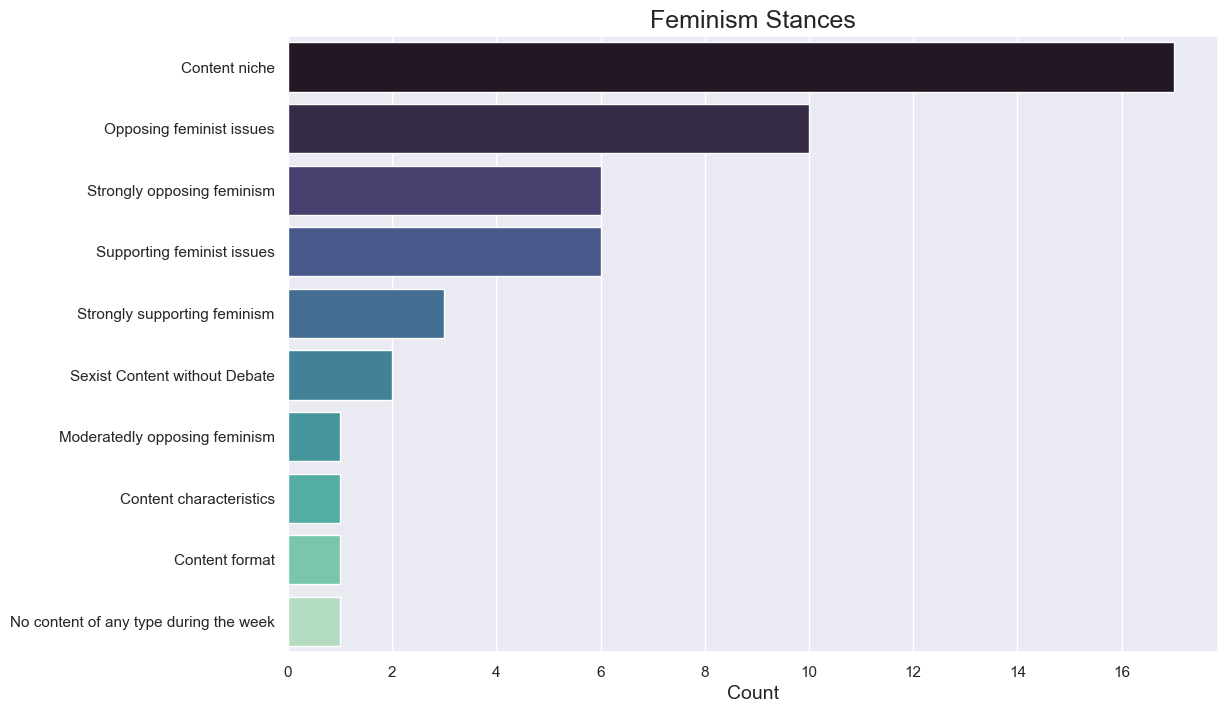

In [82]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

sns.countplot(visual_df_codebook,
              y="feminism_stance", 
              order = visual_df_codebook['feminism_stance'].value_counts().index, 
              palette='mako', 
              ) 

plt.title("Feminism Stances", fontsize=18)
plt.xlabel("Count", fontsize=14)
plt.ylabel("")
plt.show()

Preprocessing

In [17]:
df_codebook['category'].notna().value_counts()
df_codebook['category'].value_counts()

#not balanced! 

category
Non-related content    19
Antifeminism           18
Feminism                9
Neutral                 1
No content              1
Name: count, dtype: int64

In [18]:
nan_count = df_codebook['comments'].isna().sum()
non_nan_count = df_codebook['comments'].notna().sum()

print(f"Valores NaN: {nan_count}")
print(f"Valores no NaN: {non_nan_count}")

Valores NaN: 27
Valores no NaN: 21


## Sobre el análisis de sentimientos:

### Análisis de sentimiento: 
determina si el tono emocional del comentario es positivo, negativo o neutro. Dentro de la categoría 'Feminism', ¿hay comentarios con sentimientos negativos? ¿y poditivods? 

¿qué porcentaje de los comentarios feministas son positivos o negativos en tono? ¿interesa saber si hay comentarios neutros? ¿que reflejaria un comenatario neutro: falta de opinión, interés sobre el tema?

## Próximos pasos

aplicar herramienta de análisis de sentimiento a la columna survey_question_comments. y cruzar los resultados con la columna category ¿cómo se distribuyen los sentimientos dentro de cada categoría?

In [19]:
# I took this next idea from: 

# https://www.kaggle.com/code/ankumagawa/sentimental-analysis-using-naive-bayes-classifier#3.-SENTIMENTAL-ANALYSIS:

df_codebook['feminism_stance'].unique()

array(['Strongly opposing feminism', 'Moderatedly opposing feminism',
       'Opposing feminist issues',
       'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n',
       'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.',
       'Strongly supporting feminism', 'Supporting feminist issues',
       'Suporting feminist issues', 'Content niche',
       'Content characteristics', 'Content format',
       'No content of any type during the week'], dtype=object)

In [20]:
# Unify values in column 'feminism_stance'
df_codebook['feminism_stance'] = df_codebook['feminism_stance'].replace('Suporting feminist issues', 'Supporting feminist issues')

(-0.5, 799.5, 399.5, -0.5)

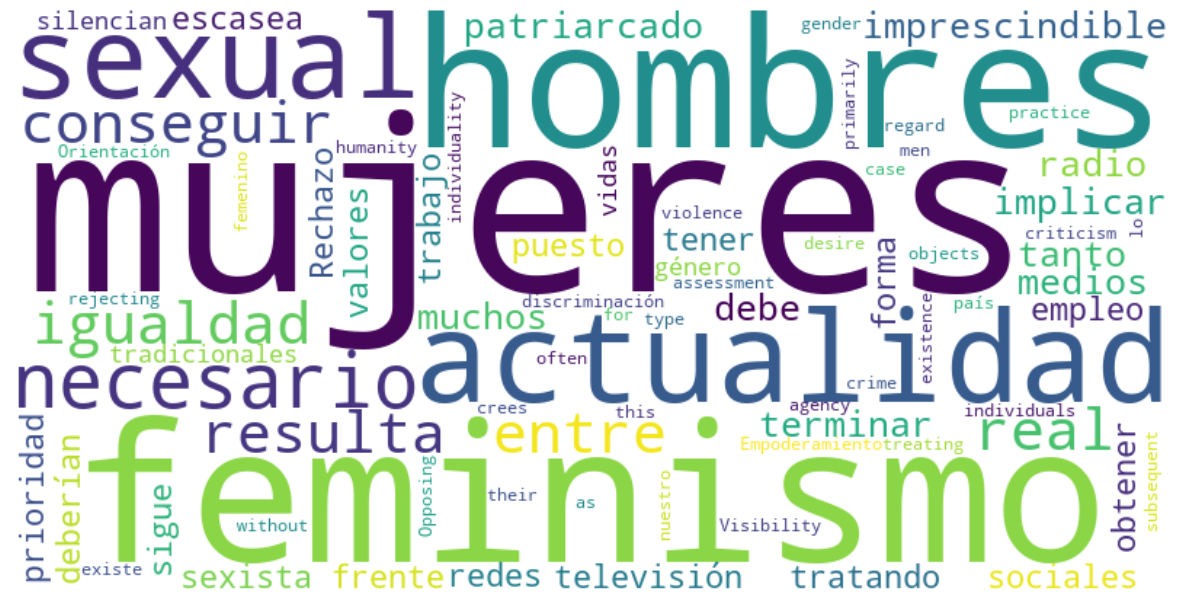

In [83]:
# # Define positive stances
# positive_stances = ['Strongly supporting feminism', 'Supporting feminist issues']

# # Join comments for positive stances
# text = " ".join(i for i in df_codebook[df_codebook['feminism_stance'].isin(positive_stances)]['comments'])

# stopwords = set(['the', 'or', 'by','and','y', 'o', 'que', 'de', 'la', 'el', 'El', 'en', 'a', 'los', 'las', 'por', 'un', 'una', \
#                  'con', 'su', 'se', 'del', 'es', 'no', 'para', 'más', 'este', 'esto', 'como','este', 'P22', 'tan',\
#                       'donde', 'cuando', 'que', 'quien', 'mi', 'me', 'te', 'su', 'mismo', 'también', 'ser', 'hay', 'of'])

# wordcloud = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(text)

# # Plott the word cloud
# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

## What are people discussing? Topics with significant impact. Still a reality, still a patriarchy.

(-0.5, 799.5, 399.5, -0.5)

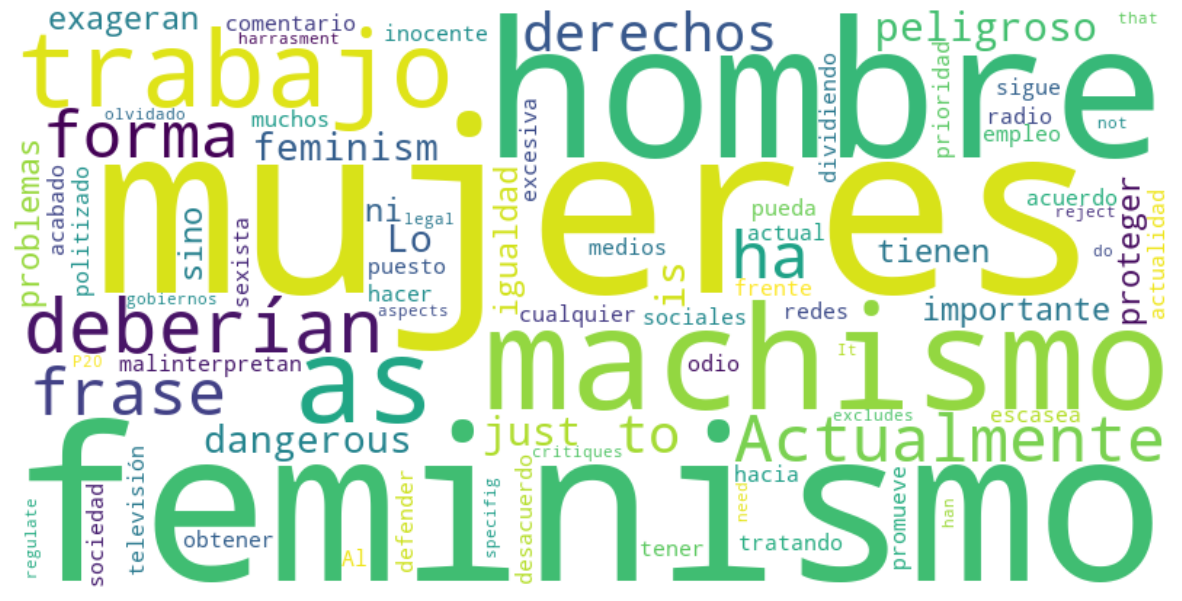

In [86]:
# negative_stances = ['Strongly opposing feminism', 'Moderatedly opposing feminism', 'Opposing feminist issues',\
#                     'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n',\
#                     'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.']

# text = " ".join(i for i in df_codebook[df_codebook['feminism_stance'].isin(negative_stances)]['comments'] if pd.notna(i))

# wordcloud = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(text)

# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")


Word Cloud: resalta palabras clave en el tema de la discusión

Análisis de Sentimiento: tono emocional del texto 

# focus: qué porcentaje de los comentarios feministas son positivos o negativos en tono. comments


In [90]:
#Tokenization

import spacy
spacy_nlp = spacy.load("es_core_news_sm")

In [91]:
df_sentiment_analysis = df_codebook[['id', 'comments', 'category', 'sub_category']].copy()

df_sentiment_analysis.head(3)

,id,comments,category,sub_category
0,1,"""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit
1,2,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit
2,3,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent


In [93]:
df_sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            48 non-null     int64 
 1   comments      21 non-null     object
 2   category      48 non-null     object
 3   sub_category  28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [94]:
# Eliminar filas donde 'comments' es NaN
df_sentiment_analysis = df_sentiment_analysis.dropna(subset=['comments'])

df_sentiment_analysis.shape

(21, 4)

In [95]:
# Def regex
REPLACE_NO_SPACE = re.compile(r"[.;:!\'¿?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

def my_clean_text(comments):

    #remove special characters
    comments = re.sub(REPLACE_NO_SPACE, "", comments)
    comments = re.sub(REPLACE_WITH_SPACE, " ", comments)

    #preprocess with spaCy
    doc = spacy_nlp(comments)

    lemmas = []
    # entities = []
    
    for token in doc:
        if not token.is_punct and not token.is_space and not token.is_stop:
            lemmas.append(token.lemma_.lower()) 

 # for ent in doc.ents:
    #     entities.append((ent.text, ent.label_))
    
    return lemmas #, entities

Attributes in spaCy
- is_punct: A boolean attribute that indicates whether the token is a punctuation mark.
- pos_: The part of speech (POS) of the token, such as noun, verb, adjective, etc.
- text: The original text of the token as it appears in the input text.

In [96]:
# Sanity check
text = df_sentiment_analysis['comments'][3]

print('before cleaning: ', text)
print('\n')
print('after cleaning: ', clean(text))


before cleaning:  "Los hombres deberían proteger a las mujeres "


after cleaning:  ['hombre', 'deber', 'proteger', 'mujer']


In [97]:
df_sentiment_analysis['tokenized_comments'] = df_sentiment_analysis.comments.apply(clean)

In [98]:
vectoriser = TfidfVectorizer(analyzer=clean)
data_tfidf = vectoriser.fit_transform(df_sentiment_analysis.comments)

In [99]:
# Save the vector space in a list
vector_space = vectoriser.get_feature_names_out()

In [100]:
len(vector_space) #the vectoriser has found 162 unique features (words)

121

## Sentiment Analysis

### Hugging face 🤗

In [101]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="es")

analyzer.predict("Qué gran jugador es Messi")
# returns AnalyzerOutput(output=POS, probas={POS: 0.998, NEG: 0.002, NEU: 0.000})


c:\Users\Celeste\anaconda3\envs\data-science\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [102]:
df_sentiment_analysis

,id,comments,category,sub_category,tokenized_comments
0,1,"""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,"[peligroso, machismo, feminismo, machismo, is,..."
1,2,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,"[importante, feminismo, machismo, igualdad]"
2,3,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,"[mujer, exagerar, problema, trabajo]"
3,4,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,"[hombre, deber, proteger, mujer]"
4,5,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,"[actualmente, mujer, malinterpretar, comentari..."
5,6,"Quien este en desacuerdo con la frase: ""En la ...",Antifeminism,Latent,"[desacuerdo, frase, actualidad, medio, radio, ..."
6,7,"Quien este de acuerdo con la frase: ""Cuando el...",Antifeminism,Latent,"[frase, empleo, escasear, hombre, deber, prior..."
7,8,"""Actualmente el feminismo se ha politizado de ...",Antifeminism,Explicit,"[actualmente, feminismo, politizar, forma, exc..."
8,9,"""El feminismo actual ha acabado dividiendo a l...",Antifeminism,Explicit,"[feminismo, actual, acabar, dividir, sociedad]"
9,10,"""El feminismo promueve el odio hacia los hombres""",Antifeminism,Explicit,"[feminismo, promover, odio, hombre]"


# metrics

C:\Users\Celeste\AppData\Local\Temp\ipykernel_9828\2128674108.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment_analysis['flair_sentiment'] = df_sentiment_analysis['flair_sentiment'].apply(lambda x: x[0])  # Toma la parte del sentimiento


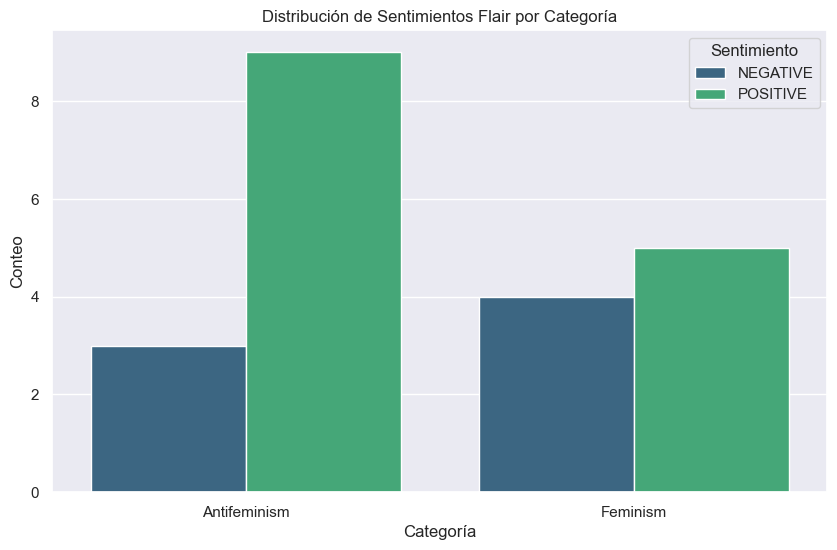

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df_sentiment_analysis ya está definido

# Extraer solo el sentimiento de flair_sentiment
df_sentiment_analysis['flair_sentiment'] = df_sentiment_analysis['flair_sentiment'].apply(lambda x: x[0])  # Toma la parte del sentimiento

# Crear el gráfico de conteo
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sentiment_analysis, x='category', hue='flair_sentiment', palette='viridis')
plt.title('Distribución de Sentimientos Flair por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.legend(title='Sentimiento', loc='upper right')
plt.show()



In [51]:
# Supongamos que has aplicado el análisis de sentimiento y ahora deseas verificar las categorías
print(df_sentiment_analysis[['flair_sentiment', 'hf_sentiment']])


   flair_sentiment hf_sentiment
0         NEGATIVE     NEGATIVE
1         NEGATIVE     NEGATIVE
2         POSITIVE     NEGATIVE
3         POSITIVE     POSITIVE
4         POSITIVE     NEGATIVE
5         POSITIVE     NEGATIVE
6         POSITIVE     NEGATIVE
7         POSITIVE     NEGATIVE
8         POSITIVE     NEGATIVE
9         NEGATIVE     NEGATIVE
10        POSITIVE     NEGATIVE
12        POSITIVE     POSITIVE
19        POSITIVE     NEGATIVE
20        POSITIVE     NEGATIVE
21        NEGATIVE     NEGATIVE
22        NEGATIVE     NEGATIVE
23        POSITIVE     NEGATIVE
24        POSITIVE     POSITIVE
25        POSITIVE     NEGATIVE
26        NEGATIVE     POSITIVE
27        NEGATIVE     NEGATIVE
